## PDS - Estudo Dirigido 5 
### Impressão digital de marca d'água utilizando DCT

In [105]:
%matplotlib inline
import io
import os
from PIL import Image, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
import urllib.request
import cv2

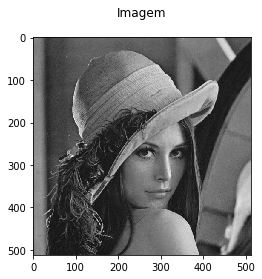

In [20]:
#Leitura da imagem através da URL

url='http://i.imgur.com/8vuLtqi.png'
url_response = urllib.request.urlopen(url) 
img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
img = cv2.imdecode(img_array, cv2.IMREAD_GRAYSCALE)  #conversão para escala de cinzas

plt.imshow(img, cmap=plt.cm.gray)
plt.title('Imagem\n');

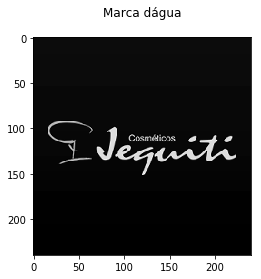

In [106]:
#Leitura da marca dágua através da URL

url2='https://i1.wp.com/planobagora.com/wp-content/uploads/2017/12/jequiti.png?resize=300%2C300'
url_response2 = urllib.request.urlopen(url2)  #leitura da imagem através da URL
img_array2 = np.array(bytearray(url_response2.read()), dtype=np.uint8)
img2 = cv2.imdecode(img_array2, 0)   #conversão para escala de cinzas
res = cv2.resize(img2,None,fx=0.8, fy=0.8, interpolation = cv2.INTER_CUBIC)  #redimensionamento da marca d'água

cmap = plt.cm.binary
norm = plt.Normalize(vmin=img_res.min(), vmax=img_res.max()) 
res = cmap(norm(img_res))

plt.imsave('res_f.png',res)

plt.imshow(res, cmap='gray')
plt.title('Marca dágua\n');

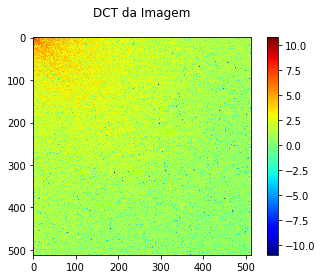

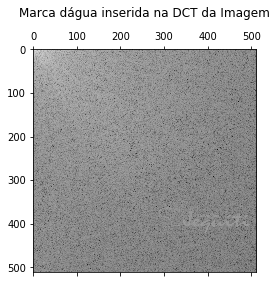

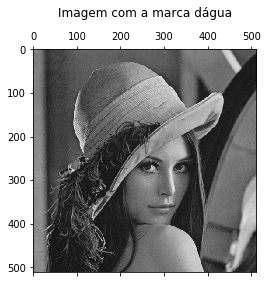

In [104]:
#Fazendo a DCT da Imagem

dct = fftpack.dct(fftpack.dct(img.T, norm='ortho').T, norm='ortho')
dct_img = np.log(np.abs(dct))

fig, ax = plt.subplots()
cax = ax.imshow(dct_img, cmap=plt.cm.jet)
cbar = fig.colorbar(cax)
res = cv2.imread('res_f.png',0)

plt.title('DCT da Imagem\n');


#Colocando a marca dágua na DCT

[l2, c2] = res.shape
[l3, c3] = dct.shape

initial_l = l3 - l2   
initial_c = c3 - c2   #demarcação do posicionamento da marca d'água

constante = 0.05   #fator de balanço para evitar perda de informação da imagem
result = dct
result[initial_l:,initial_c:] = (1-constante)*dct[initial_l:,initial_c:] + constante*res  #soma ponderada
                                                                                          #95% dct + 5% mensagem

plt.matshow(np.log(np.abs(result)),cmap=plt.cm.gray);
plt.title('Marca dágua inserida na DCT da Imagem\n');


#Fazendo a inversa da DCT com a marca dágua

im_com_marcadagua = fftpack.idct(fftpack.idct(result.T, norm='ortho').T, norm='ortho')

plt.matshow(im_com_marcadagua,cmap=plt.cm.gray);
plt.title('Imagem com a marca dágua\n');


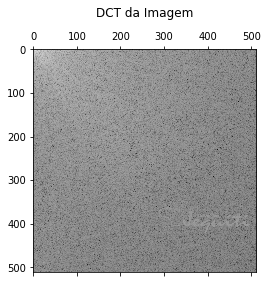

In [100]:
#Fazendo a DCT da imagem para recuperar a marca d'água

im_com_marcadagua = fftpack.dct(fftpack.dct(result.T, norm='ortho').T, norm='ortho')
plt.matshow(np.log(np.abs(result)),cmap=plt.cm.gray);
plt.title('DCT da Imagem\n');

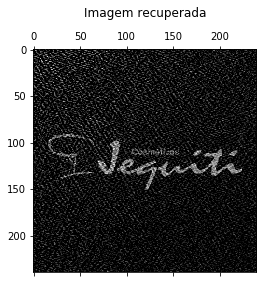

In [103]:
#Para recuperar é necessário a constante e o tamanho

recuperada = fftpack.dct(fftpack.dct(im_com_marcadagua.T, norm='ortho').T, norm='ortho')
recuperada = recuperada[initial_l:,initial_c:]
recuperada =  (1/constante)*recuperada
recuperada = (recuperada>0)*(recuperada-(1-constante)*dct[initial_l:,initial_c:])
plt.matshow(recuperada,cmap=plt.cm.gray);
plt.title('Imagem recuperada\n');